In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [3]:
! git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git

Cloning into 'Monk_Object_Detection'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 10205 (delta 20), reused 16 (delta 7), pack-reused 10171
Receiving objects: 100% (10205/10205), 253.79 MiB | 13.95 MiB/s, done.
Resolving deltas: 100% (4473/4473), done.
Checking out files: 100% (8395/8395), done.


In [2]:
! cd Monk_Object_Detection/9_segmentation_models/installation && cat requirements_colab.txt | xargs -n 1 -L 1 pip install

<a href="https://colab.research.google.com/github/Tessellate-Imaging/Monk_Object_Detection/blob/master/application_model_zoo/Example%20-%20PanNuke%20Dataset%20CellType%20Instance%20Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of contents


## 1. Installation Instructions



## 2. Use trained model to water bodies in satellite imagery



## 3. How to train a custom segmenter using "Water Body Segmentation Dataset"

# About the networks


1. UNet
  - https://arxiv.org/abs/1505.04597
  - https://towardsdatascience.com/understanding-semantic-segmentation-with-unet-6be4f42d4b47
  - https://towardsdatascience.com/unet-line-by-line-explanation-9b191c76baf5


2. FPN
  - http://openaccess.thecvf.com/content_cvpr_2017/papers/Lin_Feature_Pyramid_Networks_CVPR_2017_paper.pdf
  - https://towardsdatascience.com/review-fpn-feature-pyramid-network-object-detection-262fc7482610
  - https://medium.com/@jonathan_hui/understanding-feature-pyramid-networks-for-object-detection-fpn-45b227b9106c


3. PSPNet
  - https://arxiv.org/abs/1612.01105
  - https://towardsdatascience.com/review-pspnet-winner-in-ilsvrc-2016-semantic-segmentation-scene-parsing-e089e5df177d
  - https://developers.arcgis.com/python/guide/how-pspnet-works/


4. Linknet
  - https://arxiv.org/pdf/1707.03718.pdf
  - https://neptune.ai/blog/image-segmentation-tips-and-tricks-from-kaggle-competitions

# Installation

 - Run these commands
     
     - git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git
     
     - cd Monk_Object_Detection/9_segmentation_models/installation
     
 - Select the right requirements file and run
 
     - cat requirements_cuda9.0.txt | xargs -n 1 -L 1 pip install

In [ ]:
! git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git

In [ ]:
# For colab use the command below
! cd Monk_Object_Detection/9_segmentation_models/installation && cat requirements_colab.txt | xargs -n 1 -L 1 pip install


# For Local systems and cloud select the right CUDA version
#! cd Monk_Object_Detection/9_segmentation_models/installation && cat requirements_cuda10.0.txt | xargs -n 1 -L 1 pip install

# Use already trained model for demo

In [3]:
import os
import sys
sys.path.append("Monk_Object_Detection/9_segmentation_models/lib/");

In [4]:
from infer_segmentation import Infer

Using TensorFlow backend.


Segmentation Models: using `keras` framework.


In [5]:
gtf = Infer();

In [6]:
classes_dict = {
    'background': 0, 
    'water': 1
};
classes_to_train = ['background', 'water'];

In [7]:
gtf.Data_Params(classes_dict, classes_to_train, image_shape=[384, 384])

In [ ]:
# Download trained model

In [6]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1WF7ByC_rw70sGB_YyKd4XnB6GEErs9W4' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1WF7ByC_rw70sGB_YyKd4XnB6GEErs9W4" -O seg_road_trained.zip && rm -rf /tmp/cookies.txt

--2020-09-28 08:08:31--  https://docs.google.com/uc?export=download&id=1WF7ByC_rw70sGB_YyKd4XnB6GEErs9W4
Resolving docs.google.com (docs.google.com)... 64.233.188.139, 64.233.188.100, 64.233.188.113, ...
Connecting to docs.google.com (docs.google.com)|64.233.188.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘STDOUT’

-                       [ <=>                ]   3.18K  --.-KB/s    in 0s      

2020-09-28 08:08:32 (41.0 MB/s) - written to stdout [3254]

--2020-09-28 08:08:32--  https://docs.google.com/uc?export=download&confirm=axlv&id=1WF7ByC_rw70sGB_YyKd4XnB6GEErs9W4
Resolving docs.google.com (docs.google.com)... 64.233.188.101, 64.233.188.113, 64.233.188.138, ...
Connecting to docs.google.com (docs.google.com)|64.233.188.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-48-docs.googleusercontent.com/docs/securesc/ocgh9p3tccbuasgqbhs6eppnfhbrbho0/spenn035s6

In [7]:
! unzip -qq seg_road_trained.zip

In [8]:
gtf.Model_Params(model="Unet", backbone="efficientnetb3", path_to_model='seg_road_trained/best_model.h5')

In [9]:
gtf.Setup();

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [10]:
ls seg_road_trained/test

1  1.png  2.png  3.png  4.png  5.png  6.png  7.png  8.png


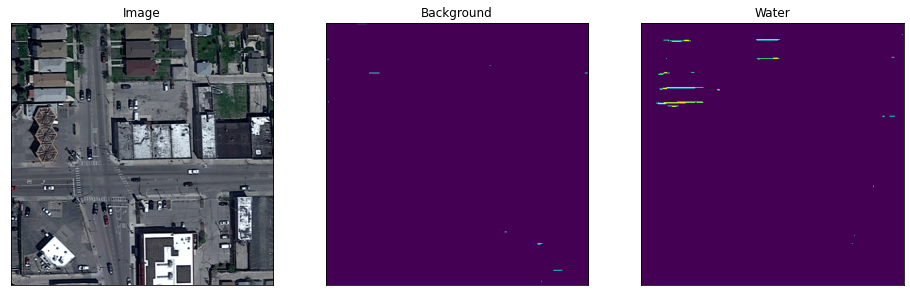

In [11]:
gtf.Predict("seg_road_trained/test/1.png", vis=True);

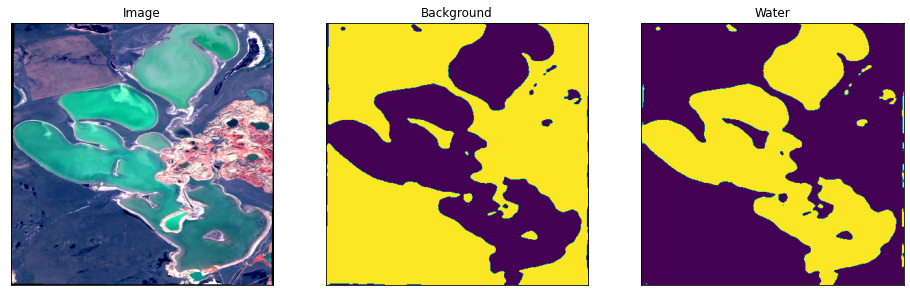

In [22]:
gtf.Predict("seg_road_trained/3.png", vis=True);

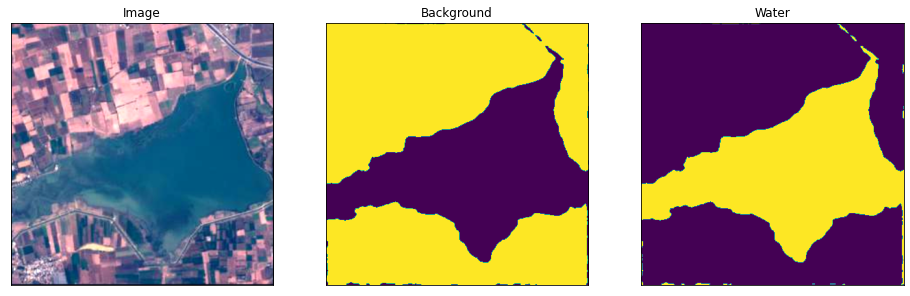

In [23]:
gtf.Predict("seg_road_trained/4.png", vis=True);

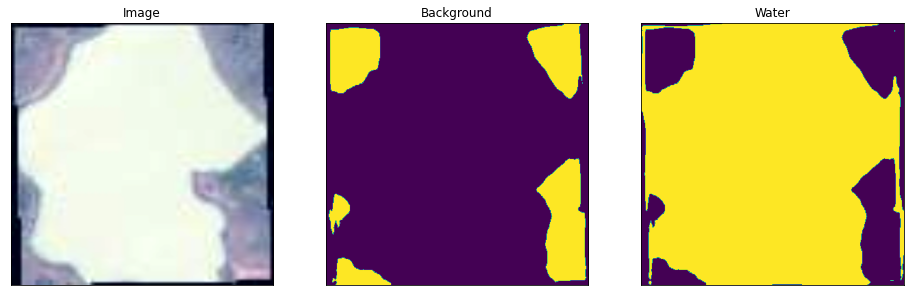

In [24]:
gtf.Predict("seg_road_trained/5.png", vis=True);

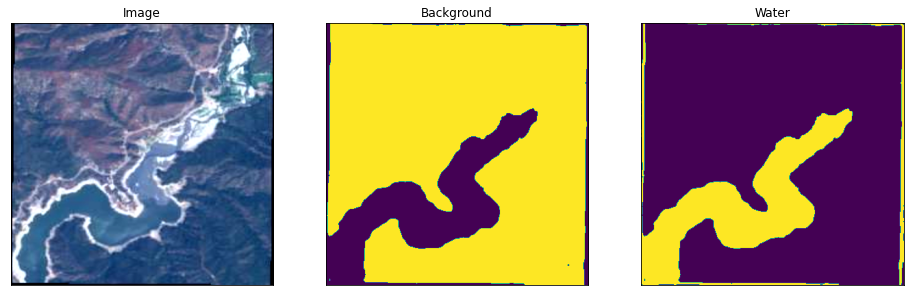

In [25]:
gtf.Predict("seg_road_trained/6.png", vis=True);

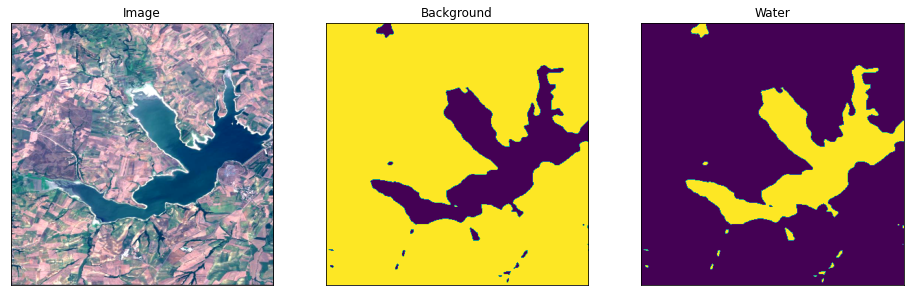

In [26]:
gtf.Predict("seg_road_trained/7.png", vis=True);

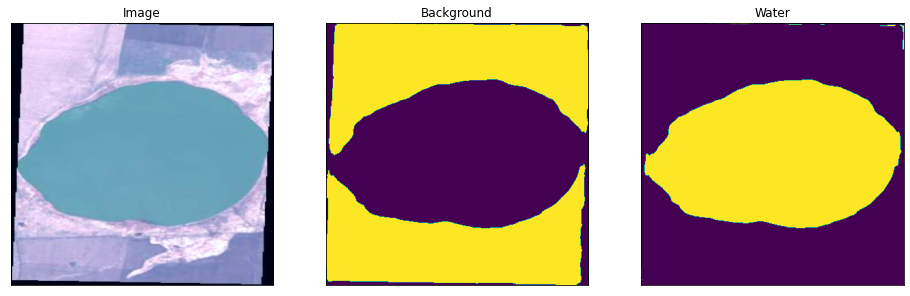

In [27]:
gtf.Predict("seg_road_trained/8.png", vis=True);

# Train you own detector

# Monk Format

## Dataset Directory Structure

      root_dir
          |
          | 
          |         
          |----train_img_dir
          |       |
          |       |---------img1.jpg
          |       |---------img2.jpg
          |                |---------..........(and so on) 
          |
          |----train_mask_dir
          |       |
          |       |---------img1.jpg
          |       |---------img2.jpg
          |                |---------..........(and so on)
          |
          |----val_img_dir (optional)
          |       |
          |       |---------img1.jpg
          |       |---------img2.jpg
          |                |---------..........(and so on)
          |
          |----val_mask_dir (optional)
          |       |
          |       |---------img1.jpg
          |       |---------img2.jpg
          |                |---------..........(and so on)

          
          

# Sample Dataset Credits

    credits: https://www.kaggle.com/franciscoescobar/satellite-images-of-water-bodies

In [ ]:
! pip install kaggle

In [ ]:
! kaggle datasets download srikaranand/road-segmentation-dataset

In [ ]:
! unzip -qq road-segmentation-dataset.zip

In [ ]:
! mkdir dataset
! mkdir dataset/images
! mkdir dataset/masks

In [ ]:
import os
import cv2
import numpy as np 
from tqdm import tqdm

In [ ]:
img_list = os.listdir("data/training/groundtruth");

In [ ]:
for i in tqdm(range(len(img_list))):
    img = cv2.imread("data/training/images/" + img_list[i]);
    img = cv2.resize(img, (384, 384));
    cv2.imwrite("dataset/images/" + str(i) + ".png", img);

    mask = cv2.imread("data/training/groundtruth/" + img_list[i], 0);
    mask = cv2.resize(mask, (384, 384));
    mask[mask > 0] = 1;
    cv2.imwrite("dataset/masks/" + str(i) + ".png", img);

## Training 

In [ ]:
import os
import sys
sys.path.append("Monk_Object_Detection/9_segmentation_models/lib/");

In [ ]:
from train_segmentation import Segmenter

In [ ]:
gtf = Segmenter();

In [ ]:
train_img_dir = "dataset/images";
train_mask_dir = "dataset/masks";

val_img_dir = "dataset/images";
val_mask_dir = "dataset/masks";


In [ ]:
classes_dict = {
    'background': 0, 
    'road': 1
};
classes_to_train = ['background', 'road'];

In [ ]:
gtf.Train_Dataset(train_img_dir, train_mask_dir, classes_dict, classes_to_train)

In [ ]:
gtf.Val_Dataset(val_img_dir, val_mask_dir)

In [ ]:
gtf.List_Backbones();

In [ ]:
gtf.Data_Params(batch_size=2, backbone="efficientnetb3", image_shape=[384, 384])

In [ ]:
gtf.List_Models();

In [ ]:
gtf.Model_Params(model="Unet")

In [ ]:
gtf.Train_Params(lr=0.0001)

In [ ]:
gtf.Setup();

In [ ]:
gtf.Train(num_epochs=300);

In [ ]:
gtf.Visualize_Training_History();

# Inference

In [28]:
import os
import sys
sys.path.append("Monk_Object_Detection/9_segmentation_models/lib/");

In [29]:
from infer_segmentation import Infer

In [30]:
gtf = Infer();

In [31]:
classes_dict = {
    'background': 0, 
    'road': 1
};
classes_to_train = ['background', 'road'];

In [32]:
gtf.Data_Params(classes_dict, classes_to_train, image_shape=[384, 384])

In [33]:
gtf.Model_Params(model="Unet", backbone="efficientnetb3", path_to_model='best_model.h5')

In [ ]:
gtf.Setup();

In [ ]:
import os
img_list = os.listdir("dataset/images_new/")

In [ ]:
gtf.Predict("dataset/images_new/" + img_list[i], vis=True);